### Imports and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data from the 3 csv files
df_customers = pd.read_csv('data/Customers.csv')
df_products = pd.read_csv('data/Products.csv')
df_transactions = pd.read_csv('data/Transactions.csv')

### View Data and Merge Dataframes

In [3]:
df_customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
df_products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [7]:
df_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [9]:
merged_df = df_transactions.merge(df_products, on='ProductID').merge(df_customers, on='CustomerID')
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,HomeSense Wall Art,Home Decor,137.54,Andrea Jenkins,Europe,2022-12-03
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,ActiveWear Rug,Home Decor,417.37,Andrea Jenkins,Europe,2022-12-03
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,BookWorld Bluetooth Speaker,Electronics,146.85,Andrea Jenkins,Europe,2022-12-03
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   ProductName      1000 non-null   object 
 8   Category         1000 non-null   object 
 9   Price_y          1000 non-null   float64
 10  CustomerName     1000 non-null   object 
 11  Region           1000 non-null   object 
 12  SignupDate       1000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


### Top Selling Products

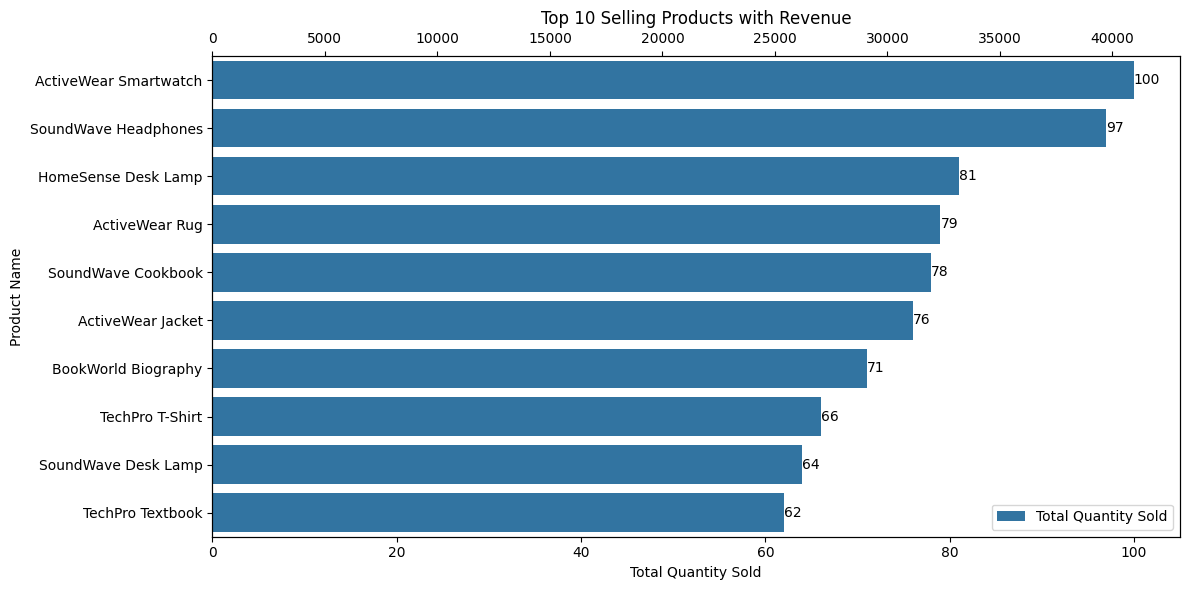

In [11]:
plt.figure(figsize=(12, 6))
top_products = merged_df.groupby('ProductName')[['Quantity', 'TotalValue']].sum().sort_values(by='Quantity', ascending=False).head(10)
ax = sns.barplot(x=top_products['Quantity'], y=top_products.index, label='Total Quantity Sold')
for i in ax.containers:
    ax.bar_label(i, fmt='%d')
ax2 = ax.twiny()
ax2.set_xlim(0, top_products['TotalValue'].max() * 1.1)
ax.set_title('Top 10 Selling Products with Revenue')
ax.set_xlabel('Total Quantity Sold')
ax.set_ylabel('Product Name')
plt.tight_layout()
plt.show()

### Revenue by Region and Category

<Figure size 1200x600 with 0 Axes>

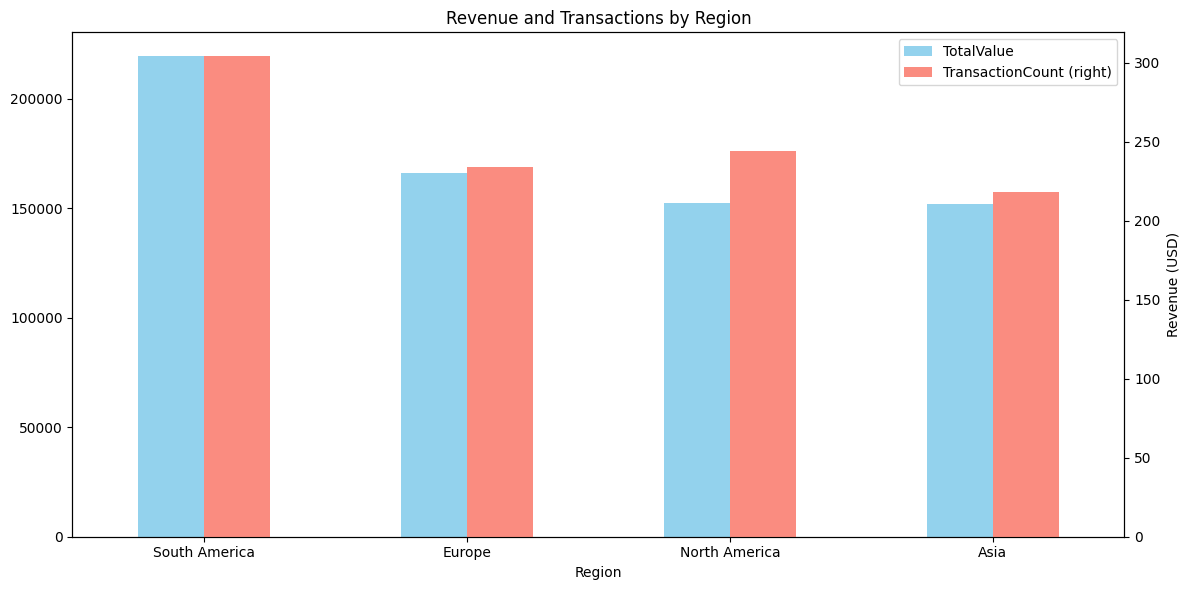

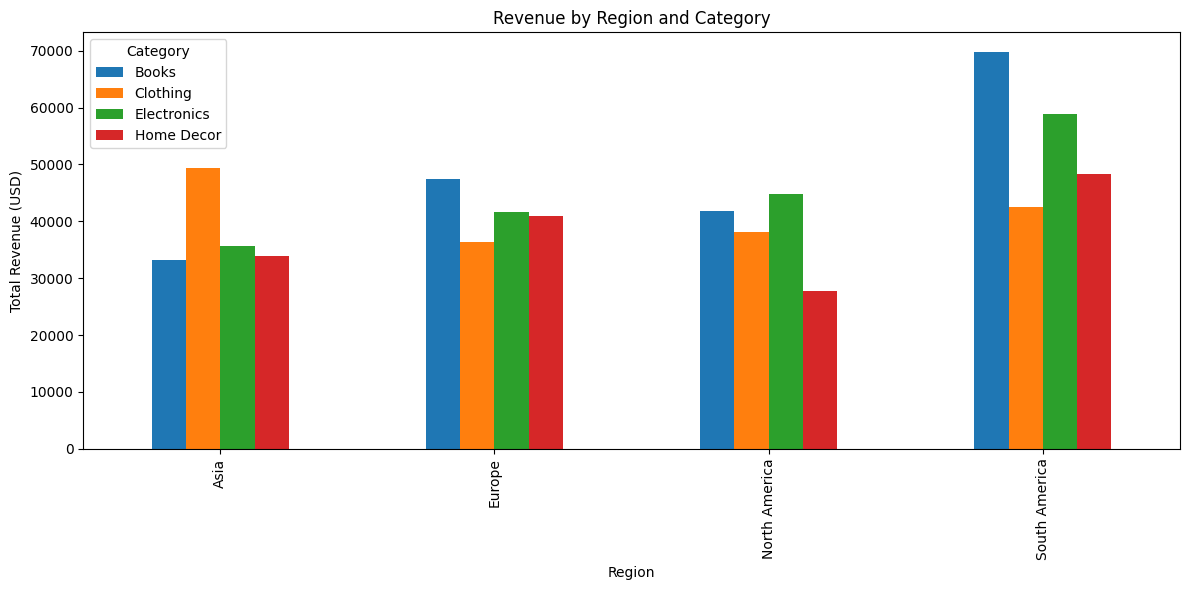

In [13]:
plt.figure(figsize=(12, 6))
region_stats = merged_df.groupby('Region').agg({'TotalValue': 'sum', 'TransactionID': 'count'}).sort_values(by='TotalValue', ascending=False)
region_stats.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)
region_stats.plot(kind='bar', secondary_y='TransactionCount', rot=0, figsize=(12, 6), color=['skyblue', 'salmon'], alpha=0.9, title='Revenue and Transactions by Region')
plt.ylabel('Revenue (USD)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

# Define colors for each category
category_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Example colors for 4 categories

category_totals = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().unstack().fillna(0)
category_totals.plot(kind='bar', stacked=False, figsize=(12, 6), color=category_colors)
plt.title('Revenue by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

### Monthly Trends

Starting Date: 2023-12-30 15:29:12
Ending Date: 2024-12-28 11:00:00


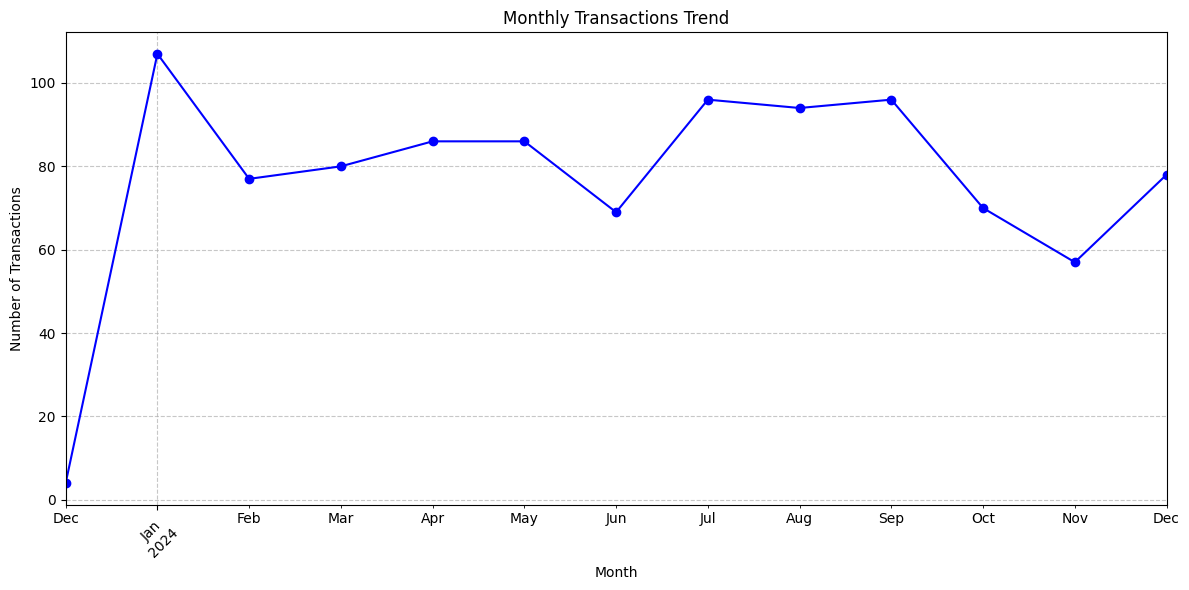

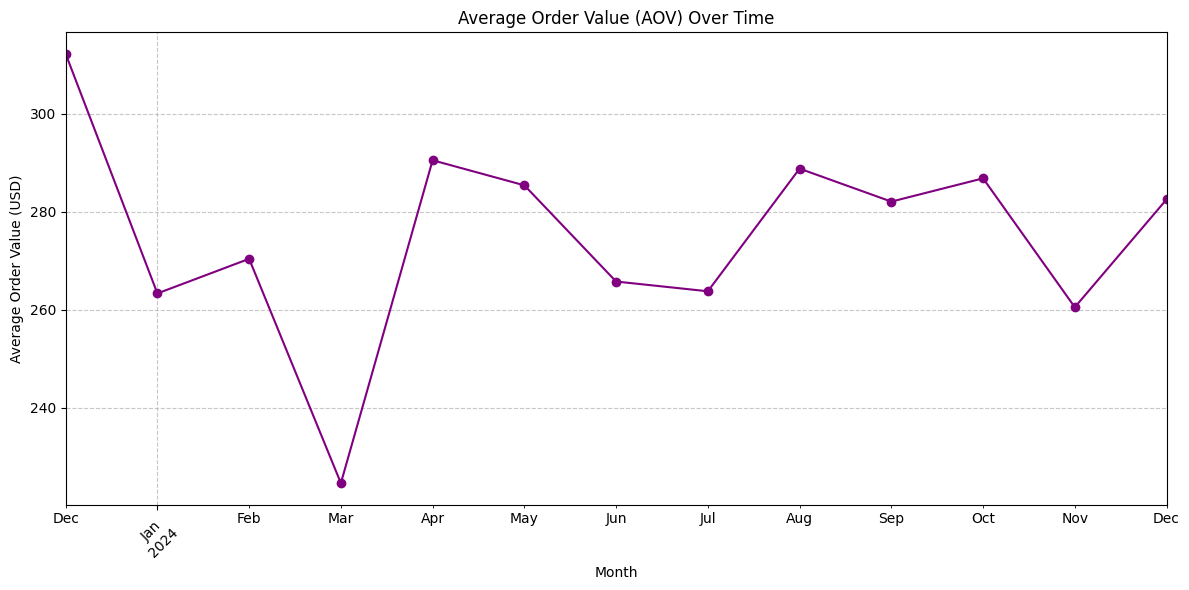

In [14]:
print(f"Starting Date: {merged_df['TransactionDate'].min()}")
print(f"Ending Date: {merged_df['TransactionDate'].max()}")

plt.figure(figsize=(12, 6))
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_transactions = merged_df.groupby('TransactionMonth').size()
monthly_transactions.plot(kind='line', marker='o', color='b', title='Monthly Transactions Trend', xlabel='Month', ylabel='Number of Transactions')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
merged_df['AOV'] = merged_df['TotalValue'] / merged_df['Quantity']
aov_trend = merged_df.groupby('TransactionMonth')['AOV'].mean()
aov_trend.plot(kind='line', marker='o', color='purple', title='Average Order Value (AOV) Over Time', xlabel='Month', ylabel='Average Order Value (USD)')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Correlation between Monthly Revenue and Customer Signups

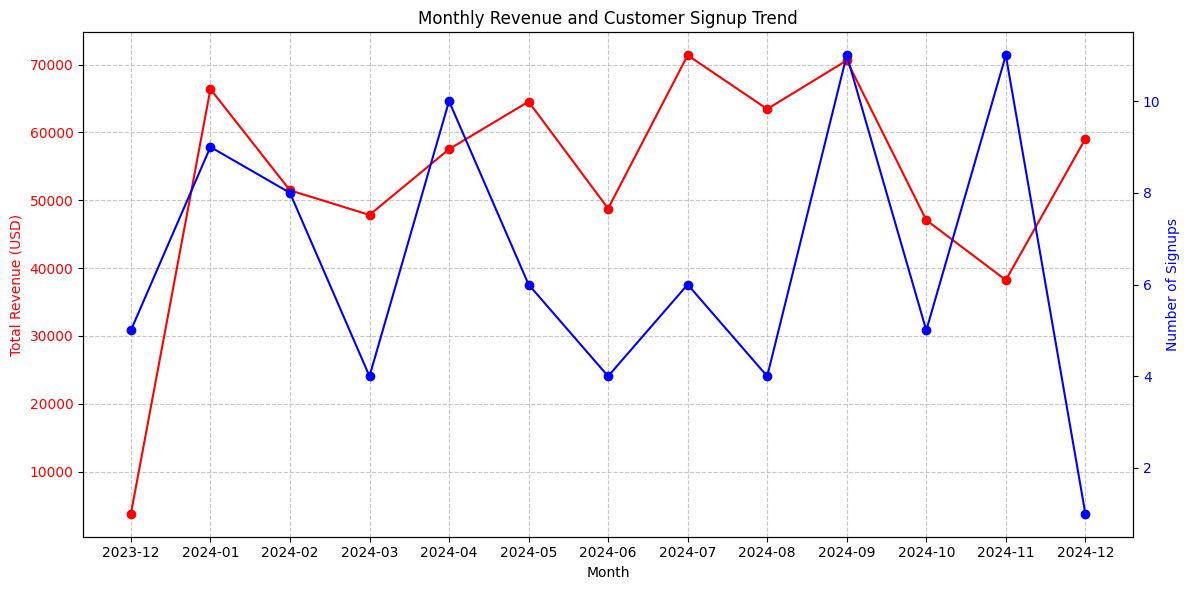

Correlation between monthly revenue and customer signups: 0.14


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_revenue = merged_df.groupby('TransactionMonth')['TotalValue'].sum()

df_customers['SignupDate'] = pd.to_datetime(df_customers['SignupDate'])
df_customers['SignupMonth'] = df_customers['SignupDate'].dt.to_period('M')
signup_trend = df_customers.groupby('SignupMonth').size()

common_months = monthly_revenue.index.intersection(signup_trend.index)

monthly_revenue_filtered = monthly_revenue[common_months]
signup_trend_filtered = signup_trend[common_months]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(monthly_revenue_filtered.index.astype(str), monthly_revenue_filtered, color='red', marker='o', label='Revenue (USD)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue (USD)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(signup_trend_filtered.index.astype(str), signup_trend_filtered, color='blue', marker='o', label='Signups')
ax2.set_ylabel('Number of Signups', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monthly Revenue and Customer Signup Trend')
ax1.grid(visible=True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

revenue_signup_corr = monthly_revenue_filtered.corr(signup_trend_filtered)
print(f"Correlation between monthly revenue and customer signups: {revenue_signup_corr:.2f}")

### Top Customers

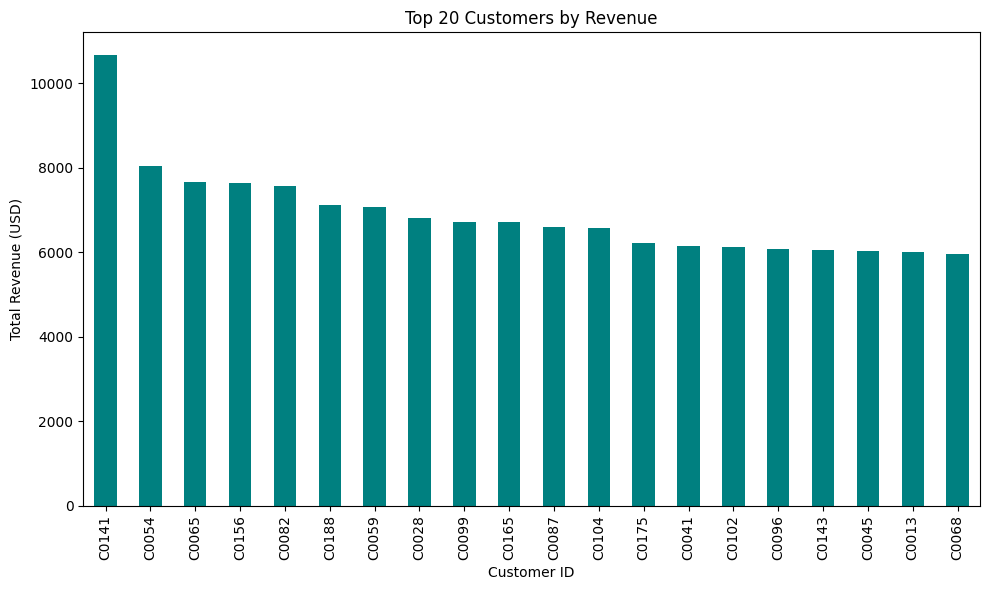

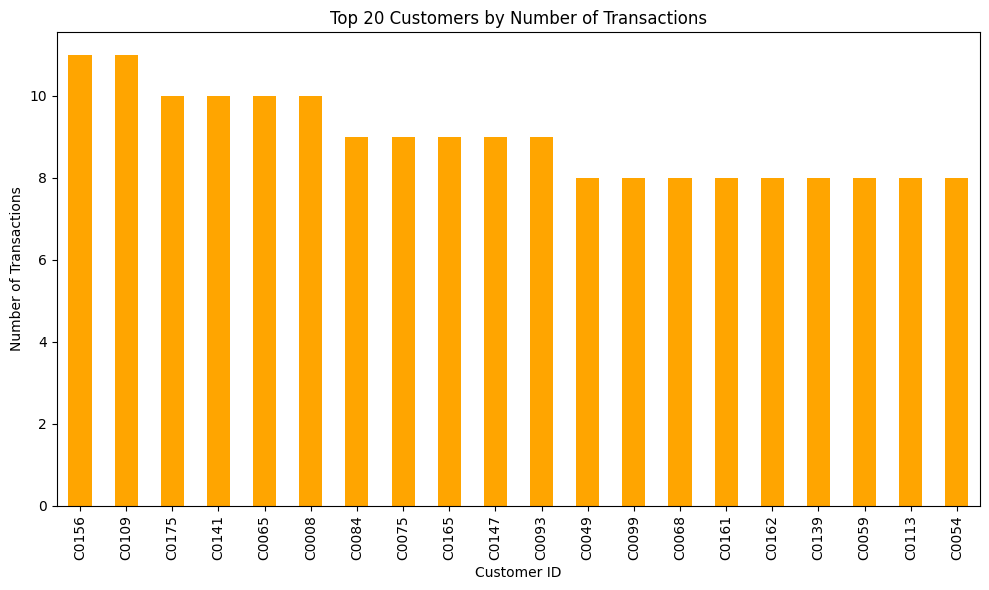

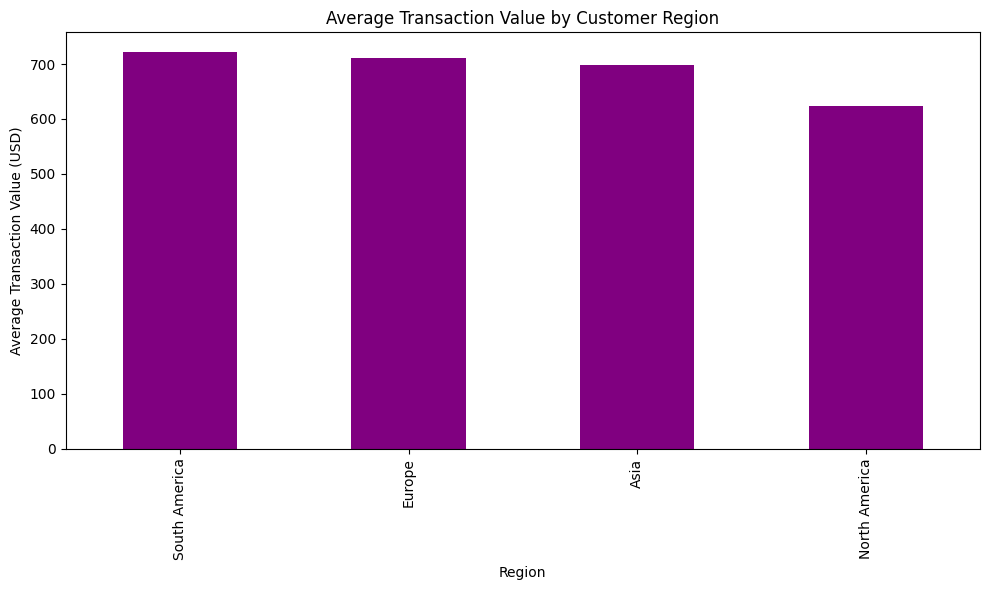

In [16]:
# Top 20 customers by revenue
customer_revenue = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
customer_revenue.head(20).plot(kind='bar', color='teal')
plt.title('Top 20 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()

# Top 20 customers by number of transactions
customer_transactions = merged_df.groupby('CustomerID')['TransactionID'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
customer_transactions.head(20).plot(kind='bar', color='orange')
plt.title('Top 20 Customers by Number of Transactions')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

# Average transaction value by customer region
region_avg_transaction = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_avg_transaction.plot(kind='bar', color='purple')
plt.title('Average Transaction Value by Customer Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.tight_layout()
plt.show()